<a href="https://colab.research.google.com/github/Greg9998/Demo111/blob/master/Lab3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 1**: Go to the Kaggle website, log in, and download the CSV file containing the dataset. Then, place the file in your Google Drive and connect Colab with it.

In [3]:
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/exercise_dataset.csv')


**Task 2**: Load dataset from CSV file using Pandas and see what is inside using functions head and describe Tip: right-click on a selected file and copy path. This will show you how to refer to files stored in Google Drive.

In [ ]:
print(data.head())
data.describe()

   ID     Exercise  Calories Burn  Dream Weight  Actual Weight  Age  Gender  \
0   1   Exercise 2     286.959851     91.892531      96.301115   45    Male   
1   2   Exercise 7     343.453036     64.165097      61.104668   25    Male   
2   3   Exercise 4     261.223465     70.846224      71.766724   20    Male   
3   4   Exercise 5     127.183858     79.477008      82.984456   33    Male   
4   5  Exercise 10     416.318374     89.960226      85.643174   29  Female   

   Duration  Heart Rate        BMI Weather Conditions  Exercise Intensity  
0        37         170  29.426275              Rainy                   5  
1        43         142  21.286346              Rainy                   5  
2        20         148  27.899592             Cloudy                   4  
3        39         170  33.729552              Sunny                  10  
4        34         118  23.286113             Cloudy                   3  


,ID,Calories Burn,Dream Weight,Actual Weight,Age,Duration,Heart Rate,BMI,Exercise Intensity
count,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000,3864.000000
mean,1932.500000,301.861806,75.139263,75.188440,39.621118,40.190994,139.777950,26.801977,5.457298
std,1115.585048,115.828604,14.545824,14.845511,12.521721,11.765957,23.447528,4.746745,2.850896
min,1.000000,100.009403,50.001984,45.783747,18.000000,20.000000,100.000000,18.500014,1.000000
25%,966.750000,202.168837,62.373585,62.476906,29.000000,30.000000,119.000000,22.686774,3.000000
50%,1932.500000,299.742508,75.522136,75.544407,40.000000,40.000000,140.000000,26.861656,5.000000
75%,2898.250000,404.143688,87.707989,88.105767,51.000000,51.000000,160.000000,30.950380,8.000000
max,3864.000000,499.859262,99.985355,104.309600,60.000000,60.000000,180.000000,34.996639,10.000000


**Task 4**: Create the following plots.
1.   A histogram showing the number of people of a specific age.
2.   Any bar graph.
3.   Scatterplot showing the Dream Weight vs Actual Weight.
4.   Any boxplot.

[Text(1, 0, 'Age'), Text(2, 0, 'Duration'), Text(3, 0, 'BMI')]

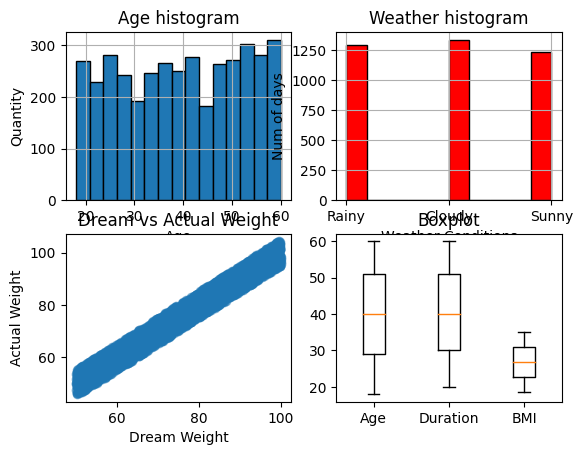

In [ ]:
from matplotlib import pyplot as plt

# Initialise the subplot function using number of rows and columns
fig, axes = plt.subplots(2, 2)

age = data['Age']
age.hist(bins=15,density=False, edgecolor="black",ax=axes[0,0])
axes[0,0].set_title('Age histogram')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Quantity')

WC = data['Weather Conditions']
WC.hist(histtype="bar",color="red",edgecolor="black",ax=axes[0,1])
axes[0,1].set_title('Weather histogram')
axes[0,1].set_xlabel('Weather Conditions')
axes[0,1].set_ylabel('Num of days')

DW = data['Dream Weight']
AW = data['Actual Weight']

axes[1,0].scatter(DW, AW,alpha=0.5)
axes[1,0].set_title('Dream vs Actual Weight')
axes[1,0].set_xlabel('Dream Weight')
axes[1,0].set_ylabel('Actual Weight')

Dur = data['Duration']
BMI = data['BMI']
BoxData = [age,Dur,BMI]
axes[1,1].boxplot(BoxData)
axes[1,1].set_title('Boxplot')
axes[1,1].set_xticklabels(['Age','Duration','BMI'])


**Task 5**: Save the selected plot as a PNG file using the savefig method.

In [ ]:
fig.savefig('plotests.png', dpi=600)

**Task 7**: Having code to create a simple scatterplot (Figure 4), improve it to have a categorical scatterplot (Figure 5).

<Figure size 1000x500 with 0 Axes>

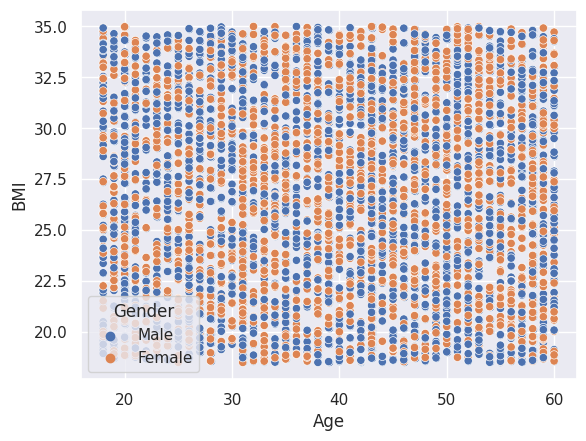

<Figure size 1000x500 with 0 Axes>

In [ ]:
from traitlets.traitlets import default
import seaborn as sns
# Apply the default theme
sns.set_theme(default)
sns.scatterplot(x=data['Age'], y=data['BMI'])
sns.scatterplot(data = data, x='Age', y='BMI',hue='Gender')
plt.figure(figsize=(10, 5))

**Task 8**:
1.   Check how your plots look after applying Seaborn’s default theme.
2.   Create a boxplot showing calories burned for each particular exercise.


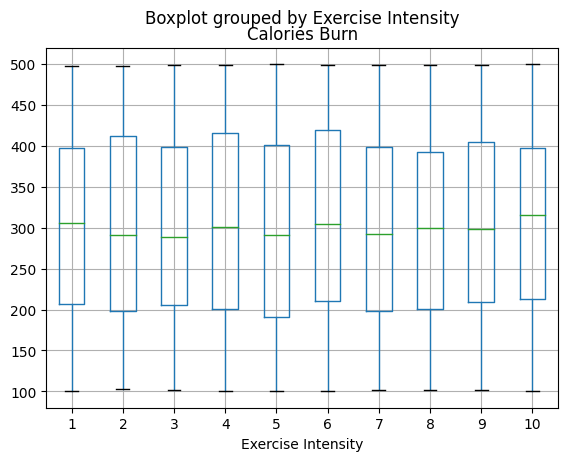

In [15]:
from matplotlib import pyplot as plt
oxData = data.boxplot("Calories Burn", by="Exercise Intensity")


**Task 9**: Correlation heatmap

<Axes: >

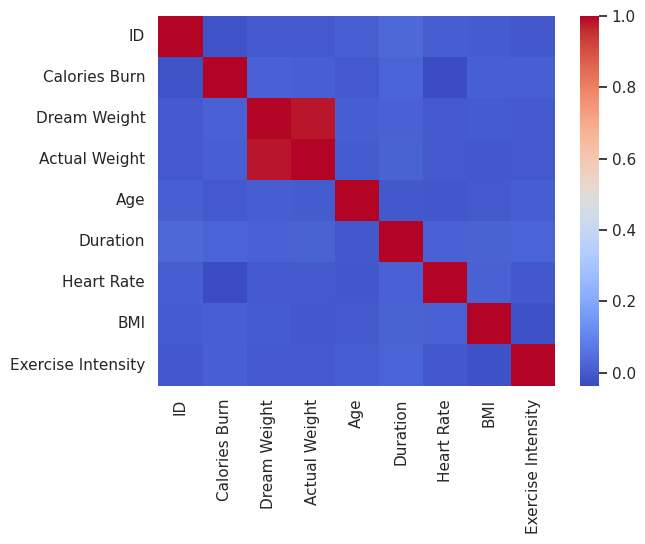

In [ ]:
corr = data.corr()
sns.heatmap(corr,cmap="coolwarm")

**Task 10**: Split the dataset into the train, validation, and test sets with a ratio of 0.6:0.2:0.2. Find out how to obtain the reproducibility of this split. Think which features would be reasonable to choose for the target. Also, consider if any features should be excluded when building the prediction model.

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop('Exercise Intensity', axis = 1)
y = data['Exercise Intensity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=12)
X_validation, X_test, y_validation, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=12)

**Task 11**: Implement the exclusion of specific parts of data based on selected features. Consider which features might be reasonable. Consider some other statistical measures

In [ ]:
q_low = data['BMI'].quantile(0.01) # get 1st percentile
q_hi = data['BMI'].quantile(0.99) # get 99th percentile
data_filtered = data[(data['BMI'] < q_hi) & (data['BMI'] > q_low)] # filter data by percentiles